In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(train_x,train_y),(test_x,test_y) = mnist.load_data()

In [4]:
len(train_y)

60000

In [5]:
len(test_y)

10000

In [6]:
train_x.shape

(60000, 28, 28)

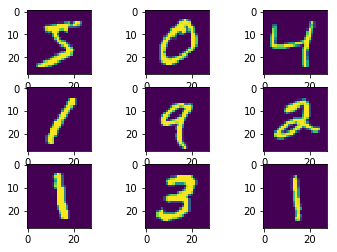

In [7]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_x[i])

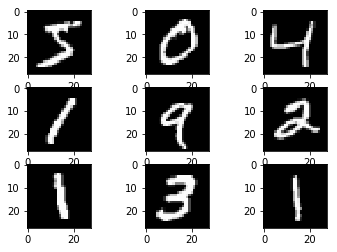

In [8]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_x[i],cmap = plt.get_cmap('gray'))

In [9]:
train_x = train_x.reshape((train_x.shape[0],28,28,1))
test_x = test_x.reshape((test_x.shape[0],28,28,1))

In [10]:
train_x.shape

(60000, 28, 28, 1)

In [11]:
test_x.shape

(10000, 28, 28, 1)

In [12]:
from sklearn.preprocessing import OneHotEncoder 

In [13]:
onehotencoder = OneHotEncoder(categorical_features = [0]) 

In [14]:
train_y = train_y.reshape(-1,1)
train_y = onehotencoder.fit_transform(train_y)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [15]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
# normalize to range 0-1
train_x = train_x / 255.0
test_x = test_x / 255.0

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from keras.optimizers import SGD
from sklearn.model_selection import KFold

In [25]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [26]:
def evaluate_model(model, dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
    # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)

    return scores, histories

In [27]:
def evaluate_model(model, dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-27-f99e67cb9323>, line 32)

In [28]:
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()
 

In [ ]:
#run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = train_x,train_y,test_x,test_y
    # define model
    model = define_model()
    # evaluate model
    scores, histories = evaluate_model(model, trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)
 # entry point, run the test harness
run_test_harness()